In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터셋 불러오기
# 첫 번째 인덱스 열 제거 후 불러옴
df = pd.read_csv('dataset.csv', index_col=0)

In [ ]:
# 'Result' 열은 phising/legitimate 데이터 가지고 있음
X = df.drop(columns=['Result'])
y = df['Result']

In [7]:
# 데이터셋을 훈련/테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# RandomForestClassifier 모델 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# 피처 중요도 추출
feature_importances = rf.feature_importances_

In [10]:
# 피처 중요도를 데이터프레임으로 정렬
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

In [11]:
# 피처 중요도 출력
print(importance_df)

                        feature  importance
7                SSLfinal_State    0.326228
13                URL_of_Anchor    0.245541
25                  web_traffic    0.069664
6             having_Sub_Domain    0.064523
14                Links_in_tags    0.043273
5                 Prefix_Suffix    0.037831
15                          SFH    0.020350
12                  Request_URL    0.019330
28       Links_pointing_to_page    0.018834
8   Domain_registeration_length    0.017556
23                age_of_domain    0.015568
0    having_IPhaving_IP_Address    0.013943
27                 Google_Index    0.013890
26                    Page_Rank    0.012773
24                    DNSRecord    0.012760
1                 URLURL_Length    0.008650
11                  HTTPS_token    0.006443
3              having_At_Symbol    0.005598
29           Statistical_report    0.005176
18                     Redirect    0.005142
16          Submitting_to_email    0.005076
21                  popUpWidnow 

<ipython-input-13-4429844b454d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')


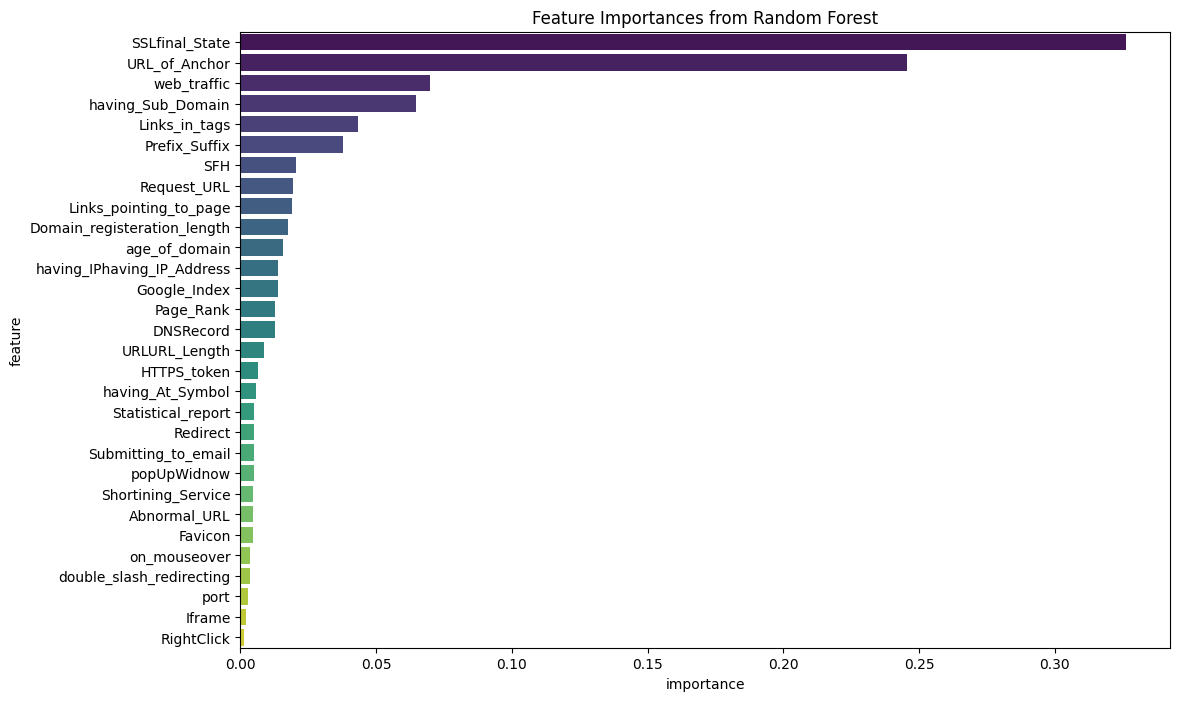

In [13]:
# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.show()